<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Run-KMLtoOSMAndGPX.py" data-toc-modified-id="Run-KMLtoOSMAndGPX.py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run KMLtoOSMAndGPX.py</a></span></li><li><span><a href="#Read-gpx-file,-extract-Track-Points" data-toc-modified-id="Read-gpx-file,-extract-Track-Points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read gpx file, extract Track Points</a></span></li><li><span><a href="#Plot-Track-Points" data-toc-modified-id="Plot-Track-Points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Track Points</a></span></li><li><span><a href="#Validate-&quot;.gpx&quot;-and-&quot;.kml&quot;-Files" data-toc-modified-id="Validate-&quot;.gpx&quot;-and-&quot;.kml&quot;-Files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Validate ".gpx" and ".kml" Files</a></span><ul class="toc-item"><li><span><a href="#Validate-&quot;.kml&quot;-Input-File" data-toc-modified-id="Validate-&quot;.kml&quot;-Input-File-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Validate ".kml" Input File</a></span></li><li><span><a href="#validate-&quot;.gpx&quot;-Output-File" data-toc-modified-id="validate-&quot;.gpx&quot;-Output-File-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>validate ".gpx" Output File</a></span></li></ul></li></ul></div>

# Run KMLtoOSMAndGPX.py

In [1]:
!python KMLtoOSMAndGPX.py "MyMap Export.kmz" "MyMap Export.gpx"


KML to OSMAnd GPX file conversion
  Version:2.3
  Input file:         MyMap Export.kmz
  Output file:        MyMap Export.gpx
  Output file path:   
  Output file name:   MyMap Export.gpx
  Layer flag:         False
  Transparency value: 0x 80
  Track width:        14
  Track split:        no_split

Starting conversion...

Processing layer#: 1 layer: Gartrip
      Track: down
   Waypoint count: 0
   Track count:    1

   Total waypoint count: 0
   Total track count:    1
   Total folder count:   1
Writing single GPX output file: MyMap Export.gpx


# Read gpx file, extract Track Points

In [2]:
from xml.etree import ElementTree as ET
gpx_ns= {'':"http://www.topografix.com/GPX/1/1"}
gpxfilename="MyMap Export.gpx"


#parse gpx file using ElementTree:
root = ET.parse(gpxfilename).getroot()
gpx_trkpts=[[float(x.attrib['lon']),float(x.attrib['lat']),float(getattr(x.find('ele',gpx_ns),'text','0.0')) ] \
               for x in root.findall('.//*/trkpt',gpx_ns)]

len(gpx_trkpts)

581

# Plot Track Points

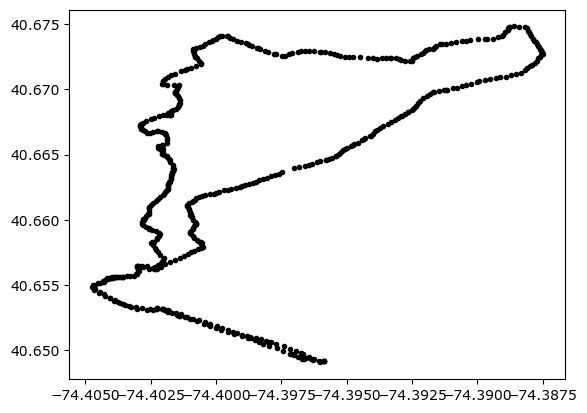

In [3]:
from matplotlib import pyplot as plt
plt.plot(*(list(zip(*gpx_trkpts))[:2]),'k.')

# Validate ".gpx" and ".kml" Files

In [4]:
#!pip install xmlschema
from urllib3 import PoolManager
import os
import xmlschema

def wget(url,outfilename=None):
  http=PoolManager()
  if outfilename==None:
    _,outfilename=os.path.split(url)
  with open(outfilename,'w',encoding='utf-8') as out:
    out.write(http.request('GET',url).data.decode('utf-8'))
    
xmlschemas=['http://www.topografix.com/GPX/1/1/gpx.xsd',
            'http://schemas.opengis.net/kml/2.2.0/ogckml22.xsd',
            'http://schemas.opengis.net/kml/2.2.0/atom-author-link.xsd',
            ]
for url in xmlschemas:
  _,filename=os.path.split(url)
  if not os.path.isfile(filename):
    print(f'Saving {url} -> {filename}')
    wget(url,filename)

## Validate ".kml" Input File

In [5]:
from zipfile import ZipFile
kmlschema=xmlschema.XMLSchema('http://schemas.opengis.net/kml/2.2.0/ogckml22.xsd')
kmlfilename="MyMap Export.kmz"
try:
  if kmlfilename.upper().rfind('.KMZ'):
    kmlschema.validate(ZipFile(kmlfilename).open('doc.kml','r'))
  else:
    kmlschema.validate(kmlfilename)
  print(f'"{kmlfilename}" is a valid kml-file!')
except Exception as e:
  print(f'"{kmlfilename}" is not a valid kml-file:\n')
  print(e)

"MyMap Export.kmz" is a valid kml-file!


## validate ".gpx" Output File

In [6]:
gpxschema=xmlschema.XMLSchema('gpx.xsd')
gpxfilename="MyMap Export.gpx"
try:
  gpxschema.validate(gpxfilename)
  print(f'"{gpxfilename}" is a valid gpx-file!')
except Exception as e:
  print(f'"{gpxfilename}" is not a valid gpx-file:\n')
  print(e)

"MyMap Export.gpx" is not a valid gpx-file:

failed validating <Element '{http://www.topografix.com/GPX/1/1}extensions' at 0x1321664d0> with XsdGroup(model='sequence', occurs=[1, 1]):

Reason: Unexpected child with tag '{http://www.topografix.com/GPX/1/1}color' at position 1.

Schema:

  <xsd:complexType xmlns:xsd="http://www.w3.org/2001/XMLSchema" name="extensionsType">
   <xsd:annotation>
    <xsd:documentation>
     You can add extend GPX by adding your own elements from another schema here.
    </xsd:documentation>
   </xsd:annotation>
    <xsd:sequence>
     <xsd:any namespace="##other" processContents="lax" minOccurs="0" maxOccurs="unbounded">
       <xsd:annotation>
        <xsd:documentation>
         You can add extend GPX by adding your own elements from another schema here.
        </xsd:documentation>
       </xsd:annotation>
     </xsd:any>
    </xsd:sequence>
  </xsd:complexType>

Instance:

  <extensions xmlns="http://www.topografix.com/GPX/1/1">
    <color>#800000FF</co